## Exercicio_02
#### Trabalhando com LinearSVC

In [1]:
Atr1 =  [0,0,0]
Atr2 =  [1,0,1]
Atr3 =  [0,0,0]

Atr4 =  [1,0,1]
Atr5 =  [0,1,1]
Atr6 =  [1,1,1]



In [2]:
dados = [ Atr1
         ,Atr2
         ,Atr3
         ,Atr4
         ,Atr5
         ,Atr6
         ]

classes = [1,1,1,0,0,0]

In [3]:
classes

[1, 1, 1, 0, 0, 0]

In [4]:
# Dados Treinamento - Base Divorce.csv
from sklearn.svm import LinearSVC

model = LinearSVC() 

In [5]:
model.fit(dados, classes)

LinearSVC()

In [6]:
#teste
atributo_m = [[1, 1, 1]]
previsoes = model.predict(atributo_m) 

# 0 - cachorro , 1- porco
print(previsoes)

[0]


In [9]:
# resultado 1 = [0, 0, 1]
# resultado 2 = [0, 1, 0]

teste_casal = [[1, 1, 1], [0, 0, 0], [0, 0, 1]]
previsoes = model.predict(teste_casal) 
testes_classes = [1, 0, 1] 
print (previsoes)

[0 1 1]


In [10]:
corretos = (previsoes == testes_classes).sum()
total = len(teste_casal)
tx_acerto = corretos/total
print("Taxa de acerto ", tx_acerto * 100)

Taxa de acerto  33.33333333333333


In [11]:
tx_erro = 1 - tx_acerto
print("Taxa de erro ", tx_erro * 100)

Taxa de erro  66.66666666666667


In [12]:
from sklearn.metrics import accuracy_score

tx_acerto = accuracy_score(testes_classes, previsoes)
tx_acerto

0.3333333333333333

In [13]:
#final
from sklearn.metrics import confusion_matrix

print(confusion_matrix(testes_classes, previsoes))

[[0 1]
 [1 1]]


## Exercicio_02
#### Trabalhando com Arvores

In [14]:
import pandas as pd


uri = "https://raw.githubusercontent.com/alanammorais/ml_Uniesp/master/datasets/Aula%2002/divorce/divorce.csv"
dados = pd.read_csv(uri)

In [15]:
dados.columns

Index(['Atr1', 'Atr2', 'Atr3', 'Atr4', 'Atr5', 'Atr6', 'Atr7', 'Atr8', 'Atr9',
       'Atr10', 'Atr11', 'Atr12', 'Atr13', 'Atr14', 'Atr15', 'Atr16', 'Atr17',
       'Atr18', 'Atr19', 'Atr20', 'Atr21', 'Atr22', 'Atr23', 'Atr24', 'Atr25',
       'Atr26', 'Atr27', 'Atr28', 'Atr29', 'Atr30', 'Atr31', 'Atr32', 'Atr33',
       'Atr34', 'Atr35', 'Atr36', 'Atr37', 'Atr38', 'Atr39', 'Atr40', 'Atr41',
       'Atr42', 'Atr43', 'Atr44', 'Atr45', 'Atr46', 'Atr47', 'Atr48', 'Atr49',
       'Atr50', 'Atr51', 'Atr52', 'Atr53', 'Atr54', 'Class'],
      dtype='object')

In [16]:
dados

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [18]:
# X = dados[[
#            'Atr1', 'Atr2', 'Atr3', 'Atr4', 'Atr5', 'Atr6', 'Atr7', 'Atr8', 'Atr9',
#            'Atr10', 'Atr11', 'Atr12', 'Atr13', 'Atr14', 'Atr15', 'Atr16', 'Atr17',
#            'Atr18', 'Atr19', 'Atr20', 'Atr21', 'Atr22', 'Atr23', 'Atr24', 'Atr25',
#            'Atr26', 'Atr27', 'Atr28', 'Atr29', 'Atr30', 'Atr31', 'Atr32', 'Atr33',
#            'Atr34', 'Atr35', 'Atr36', 'Atr37', 'Atr38', 'Atr39', 'Atr40', 'Atr41',
#            'Atr42', 'Atr43', 'Atr44', 'Atr45', 'Atr46', 'Atr47', 'Atr48', 'Atr49',
#            'Atr50', 'Atr51', 'Atr52', 'Atr53', 'Atr54']]
 
 X = dados.drop(columns=['Class'], axis=1)
 X.sample(10)

In [19]:
y = dados['Class']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

treino_x, teste_x, treino_y, teste_y = train_test_split(
            X, y, test_size =0.30, stratify = y)
print(treino_x.shape)
print(teste_x.shape)

(119, 54)
(51, 54)


### Criando e treinando a arvore

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
modelo = DecisionTreeClassifier(max_depth=6, criterion="entropy")
modelo.fit(treino_x, treino_y)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

### Predição

In [23]:
#Teste 
previsoes = modelo.predict(teste_x)
previsoes

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1])

In [24]:
from sklearn.metrics import accuracy_score
print("A acurácia foi %.2f%%" % (accuracy_score(teste_y, previsoes)*100))

A acurácia foi 96.08%


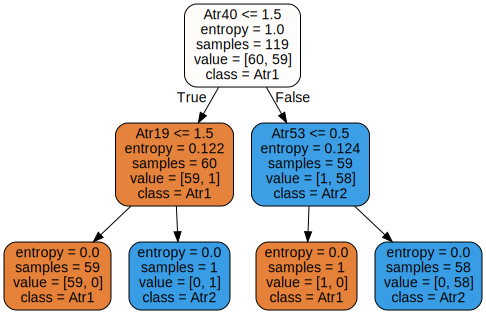

In [26]:
from sklearn.tree import export_graphviz
import graphviz

features = X.columns
dot_data = export_graphviz(
    modelo, out_file=None, filled = True, 
    rounded = True, feature_names = features, 
    class_names = ["Atr1", "Atr2", "Atr3"])
grafico = graphviz.Source(dot_data)
grafico

**## É possível por meio de um conjunto de características saber se um casal está divorciado ou não?**

Sim, é possivel ter uma noção da discursão que está ocorrendo entre o casal, e "prever" um possivel desfecho para tal.